# $\text{ARIMA}(p,d,q)$

ARIMA stands for Auto Regressive Integrated Moving Average. The intent of $\text{ARIMA}(p,d,q)$ is to construct a stationary, $\text{ARMA}(p,q)$</br>
time series from a non-stationary time series by differencing $d$ times. Recall that an $\text{ARMA}(p,q)$ process is defined by,

$
\begin{align}
X_t = \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \vartheta_i \varepsilon_{t-i}
\end{align}
$

In terms of the lag operator $L X_t = X_{t-1}, L^2 X_t = X_{t-2}, L^3 X_t = X_{t-3}, \ldots$, The $\text{ARMA}(p,q)$ model can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The difference operator is given by $\Delta = (1 - L)$. If $X_t$ is stationary after $d$ differences it follows that $\left( 1 - L \right)^d X_t$ is stationary. This is the definition of integration order.</br> 
Thus, $\text{ARIMA}(p,d,q)$ can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) \left( 1 - L \right)^d X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The procedure followed to determine the order and coefficients of an $\text{ARIMA}(p,d,q)$ series is as follows.

1. Use ADF test to determine if series is stationary. To determine $d$ difference series until ADF test fails.
2. User PACF/ACF analysis to determine $p$ and $q$.
3. Perform regression on differenced series to determine coefficients.

## Includes

In [50]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import adf
from lib import stats
from lib.plot_config import (DataPlotType)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## $\text{ARIMA}(1,1,0)$ Example

In [79]:
nsample = 1000
σ = 1.0
nlags = 10

In [80]:
φ = numpy.array([0.5])
d = 1
ar = arima.arp(φ, nsample)
samples = arima.arima_from_arma(ar, d)
diff_1 = arima.diff(samples)

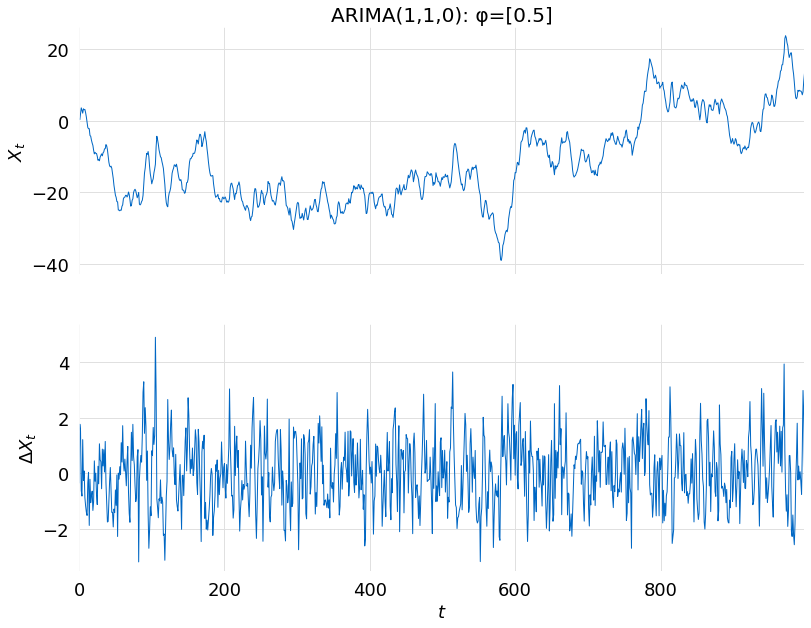

In [81]:
title = f"ARIMA(1,1,0): φ={φ}"
plots.stack([samples[:-1], diff_1], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1])

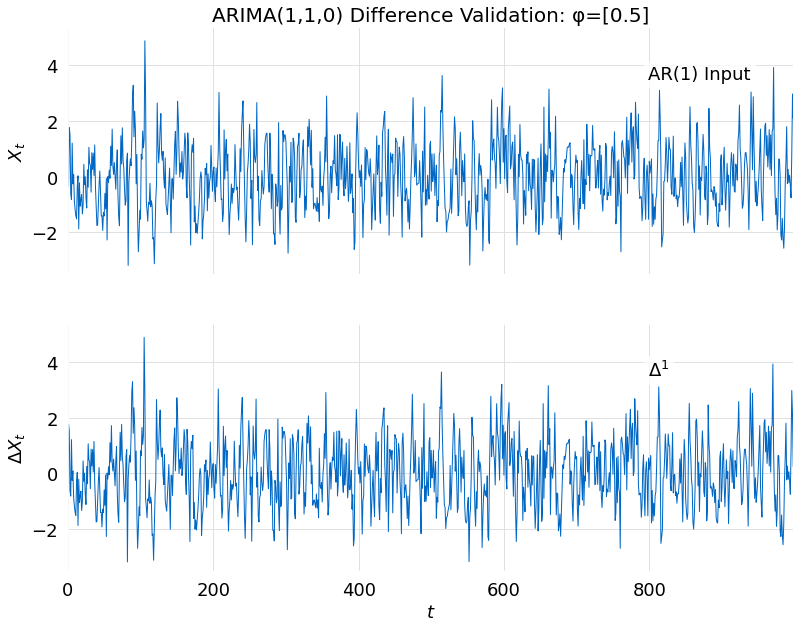

In [82]:
title = f"ARIMA(1,1,0) Difference Validation: φ={φ}"
plots.stack([ar[:-1], diff_1], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1], labels=[r"AR(1) Input", r"$\Delta^1 X_t$"])

In [83]:
arima.adf_test(samples, True)

╒════════════════╤═════════════╕
│ Test Statistic │  -1.76588   │
├────────────────┼─────────────┤
│ pvalue         │   0.0735188 │
├────────────────┼─────────────┤
│ Lags           │   3         │
├────────────────┼─────────────┤
│ Number Obs     │ 996         │
╘════════════════╧═════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

In [84]:
arima.adf_test(diff_1, True)

╒════════════════╤═══════════════╕
│ Test Statistic │ -13.6518      │
├────────────────┼───────────────┤
│ pvalue         │   9.18085e-25 │
├────────────────┼───────────────┤
│ Lags           │   4           │
├────────────────┼───────────────┤
│ Number Obs     │ 994           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

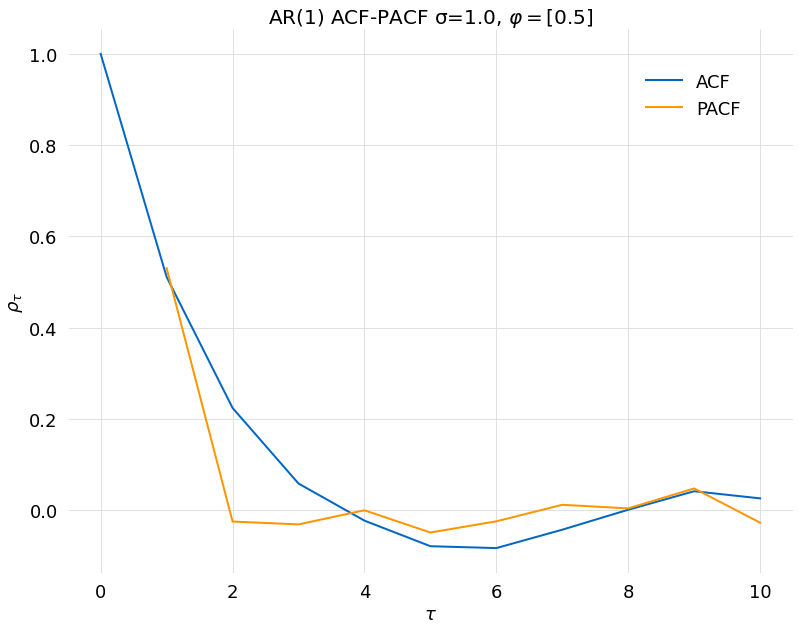

In [85]:
acf = stats.acf(diff_1, nlags)
pacf = arima.yw(diff_1, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
y = [acf, pacf]
x = [range(nlags+1), range(1, nlags+1)]
plots.comparison(y, x=x, title=title, labels=["ACF", "PACF"], plot_type=DataPlotType.ACF)

In [87]:
result = arima.ar_estimate(diff_1, 1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  999
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1451.793
Date:                Sun, 10 Apr 2022   AIC                           2909.586
Time:                        15:34:13   BIC                           2924.307
Sample:                             0   HQIC                          2915.181
                                - 999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0126      0.068      0.187      0.852      -0.120       0.145
ar.L1          0.5106      0.027     18.704      0.000       0.457       0.564
sigma2         1.0707      0.046     23.224      0.000       0.980       1.161
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):                 5.63
Prob(Q):                              0.41   Prob(JB):                         0.06
Heteroskedasticity (H):               0.90   Skew:                             0.16
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(1,2,0)$ Example

In [98]:
φ = numpy.array([0.75])
d = 2
ar = arima.arp(φ, nsample)
samples = arima.arima_from_arma(ar, d)
diff_1 = arima.diff(samples)
diff_2 = arima.diff(diff_1)

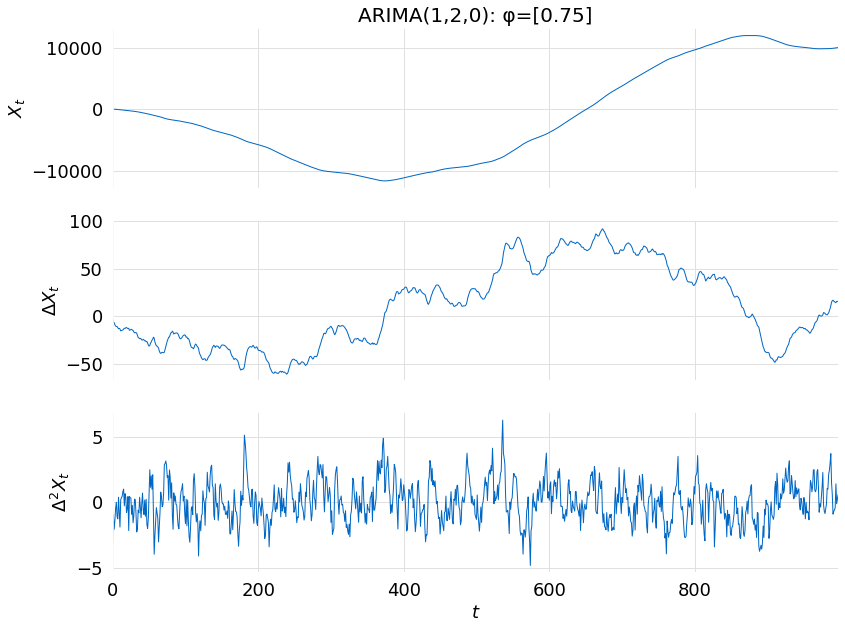

In [99]:
title = f"ARIMA(1,2,0): φ={φ}"
plots.stack([samples[:-2], diff_1[:-1], diff_2], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1, DataPlotType.DIFF_2])

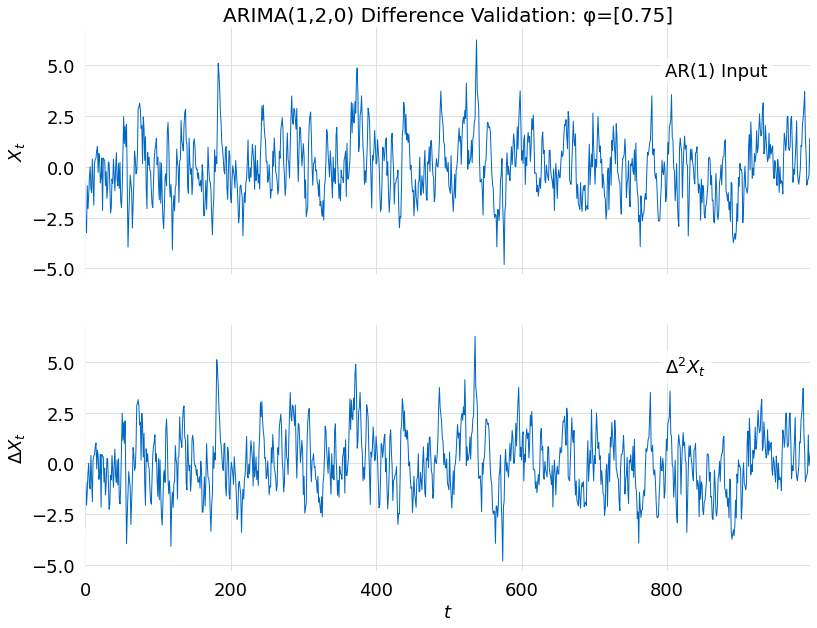

In [107]:
title = f"ARIMA(1,2,0) Difference Validation: φ={φ}"
plots.stack([ar[:-2], diff_2], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1], labels=[r"AR(1) Input", r"$\Delta^2 X_t$"])

In [101]:
arima.adf_test(samples, True)

╒════════════════╤════════════╕
│ Test Statistic │  -1.52491  │
├────────────────┼────────────┤
│ pvalue         │   0.119483 │
├────────────────┼────────────┤
│ Lags           │   2        │
├────────────────┼────────────┤
│ Number Obs     │ 997        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [102]:
arima.adf_test(diff_1, True)

╒════════════════╤════════════╕
│ Test Statistic │  -1.4328   │
├────────────────┼────────────┤
│ pvalue         │   0.141769 │
├────────────────┼────────────┤
│ Lags           │   1        │
├────────────────┼────────────┤
│ Number Obs     │ 997        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [103]:
arima.adf_test(diff_2, True)

╒════════════════╤═══════════════╕
│ Test Statistic │ -12.0847      │
├────────────────┼───────────────┤
│ pvalue         │   4.93134e-22 │
├────────────────┼───────────────┤
│ Lags           │   0           │
├────────────────┼───────────────┤
│ Number Obs     │ 997           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

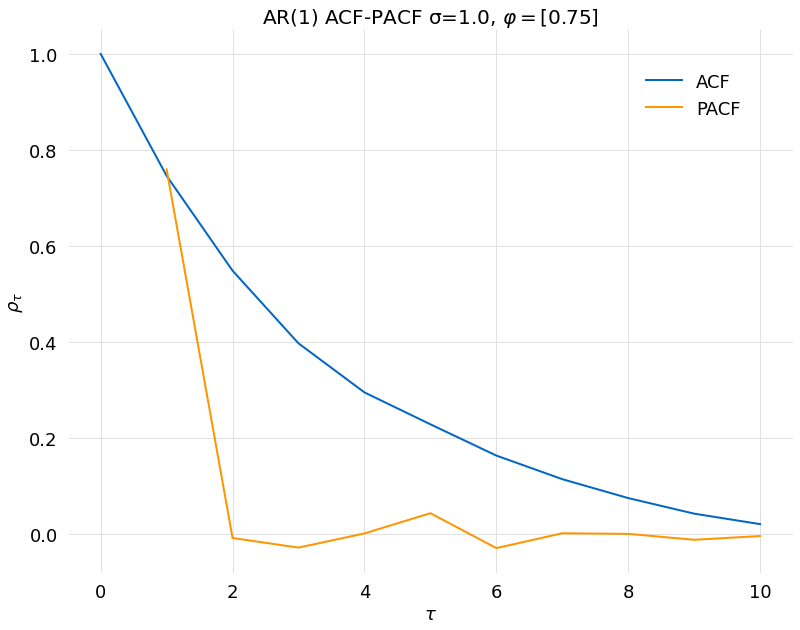

In [104]:
acf = stats.acf(diff_2, nlags)
pacf = arima.yw(diff_2, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
y = [acf, pacf]
x = [range(nlags+1), range(1, nlags+1)]
plots.comparison(y, x=x, title=title, labels=["ACF", "PACF"], plot_type=DataPlotType.ACF)

In [105]:
result = arima.ar_estimate(diff_2, 1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  998
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1429.796
Date:                Sun, 10 Apr 2022   AIC                           2865.592
Time:                        15:49:44   BIC                           2880.309
Sample:                             0   HQIC                          2871.186
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.126      0.086      0.932      -0.236       0.258
ar.L1          0.7491      0.020     37.540      0.000       0.710       0.788
sigma2         1.0270      0.047     21.897      0.000       0.935       1.119
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.69   Prob(JB):                         0.89
Heteroskedasticity (H):               0.89   Skew:                             0.01
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(2,2,0)$ Example

In [108]:
φ = numpy.array([0.25, 0.4])
d = 2
ar = arima.arp(φ, nsample)
samples = arima.arima_from_arma(ar, d)
diff_1 = arima.diff(samples)
diff_2 = arima.diff(diff_1)

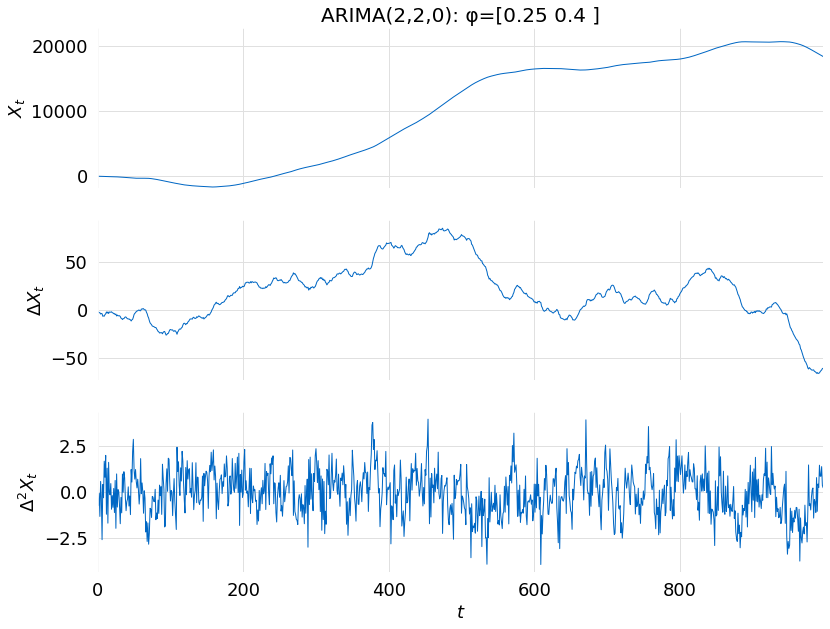

In [109]:
title = f"ARIMA(2,2,0): φ={φ}"
plots.stack([samples[:-2], diff_1[:-1], diff_2], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1, DataPlotType.DIFF_2])

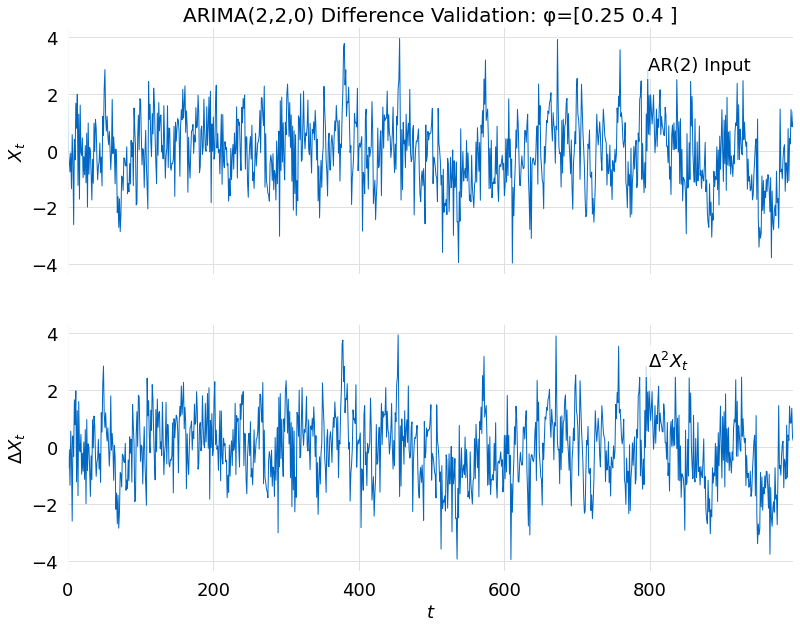

In [111]:
title = f"ARIMA(2,2,0) Difference Validation: φ={φ}"
plots.stack([ar[:-2], diff_2], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1], labels=[r"AR(2) Input", r"$\Delta^2 X_t$"])

In [112]:
arima.adf_test(samples, True)

╒════════════════╤═════════════╕
│ Test Statistic │  -1.76254   │
├────────────────┼─────────────┤
│ pvalue         │   0.0740431 │
├────────────────┼─────────────┤
│ Lags           │   3         │
├────────────────┼─────────────┤
│ Number Obs     │ 996         │
╘════════════════╧═════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

In [113]:
arima.adf_test(diff_1, True)

╒════════════════╤════════════╕
│ Test Statistic │  -0.79699  │
├────────────────┼────────────┤
│ pvalue         │   0.371782 │
├────────────────┼────────────┤
│ Lags           │   2        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [114]:
arima.adf_test(diff_2, True)

╒════════════════╤═══════════════╕
│ Test Statistic │ -11.1183      │
├────────────────┼───────────────┤
│ pvalue         │   4.08849e-20 │
├────────────────┼───────────────┤
│ Lags           │   1           │
├────────────────┼───────────────┤
│ Number Obs     │ 996           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

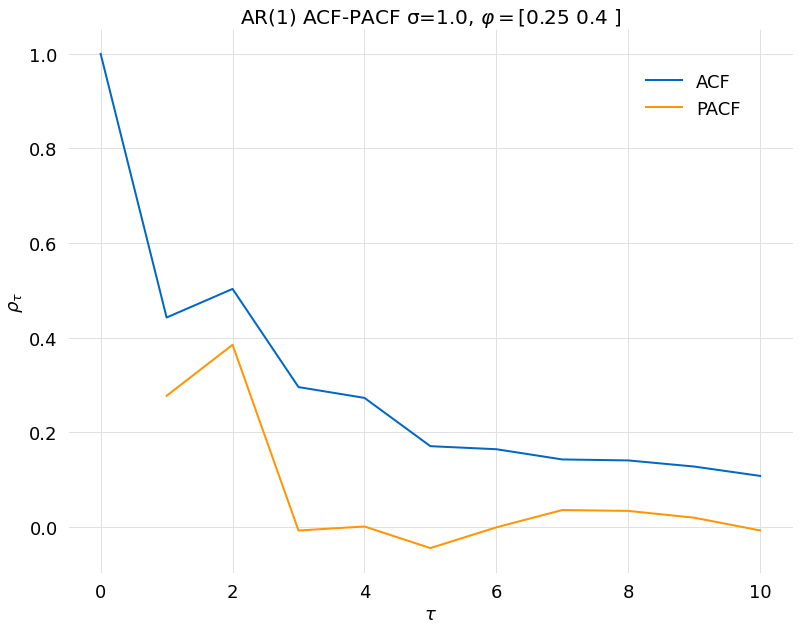

In [115]:
acf = stats.acf(diff_2, nlags)
pacf = arima.yw(diff_2, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
y = [acf, pacf]
x = [range(nlags+1), range(1, nlags+1)]
plots.comparison(y, x=x, title=title, labels=["ACF", "PACF"], plot_type=DataPlotType.ACF)

In [117]:
result = arima.ar_estimate(diff_2, 2)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  998
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1435.206
Date:                Sun, 10 Apr 2022   AIC                           2878.412
Time:                        15:56:33   BIC                           2898.035
Sample:                             0   HQIC                          2885.870
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0590      0.094     -0.631      0.528      -0.242       0.124
ar.L1          0.2732      0.029      9.485      0.000       0.217       0.330
ar.L2          0.3814      0.029     13.263      0.000       0.325       0.438
sigma2         1.0385      0.045     23.192      0.000       0.951       1.126
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.68
Prob(Q):                              0.84   Prob(JB):                         0.43
Heteroskedasticity (H):               0.95   Skew:                            -0.05
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""